# Libraries

In [5]:
import numpy as np
import pandas as pd

%pip install matplotlib
import matplotlib.pyplot as plt

%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
fraud_df_v1=pd.read_csv('data/fraudTrain.csv')

In [7]:
fraud_df_v1.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [37]:
fraud_df_v2=fraud_df_v1.drop(columns=[ 'Unnamed: 0','trans_num','first','last','lat','long','unix_time','merch_long','merch_lat','zip'])
fraud_df_v2.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
gender                    object
street                    object
city                      object
state                     object
city_pop                   int64
job                       object
dob                       object
is_fraud                   int64
dtype: object

In [39]:
for column in fraud_df_v2.columns:
    if column != 'trans_date_trans_time':
        print(f"Group sizes for {column}:\n")
        group_sizes = fraud_df_v2.groupby(column).size()
        print(group_sizes)
        print("\n" + "="*40 + "\n")


Group sizes for cc_num:

cc_num
60416207185            1518
60422928733            1531
60423098130             510
60427851591             528
60487002085             496
                       ... 
4958589671582726883    1476
4973530368125489546    1040
4980323467523543940     532
4989847570577635369    1007
4992346398065154184    2059
Length: 983, dtype: int64


Group sizes for merchant:

merchant
fraud_Abbott-Rogahn                 1844
fraud_Abbott-Steuber                1763
fraud_Abernathy and Sons            1751
fraud_Abshire PLC                   1895
fraud_Adams, Kovacek and Kuhlman     940
                                    ... 
fraud_Zemlak Group                  1297
fraud_Zemlak, Tillman and Cremin    1804
fraud_Ziemann-Waters                1695
fraud_Zieme, Bode and Dooley        2560
fraud_Zulauf LLC                    1783
Length: 693, dtype: int64


Group sizes for category:

category
entertainment      94014
food_dining        91461
gas_transport     131659
grocer

<Figure size 2000x1200 with 0 Axes>

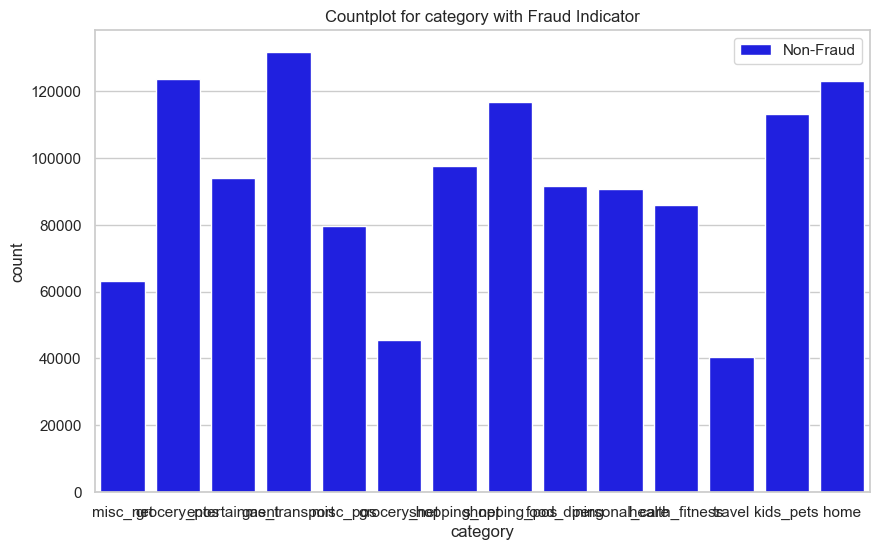

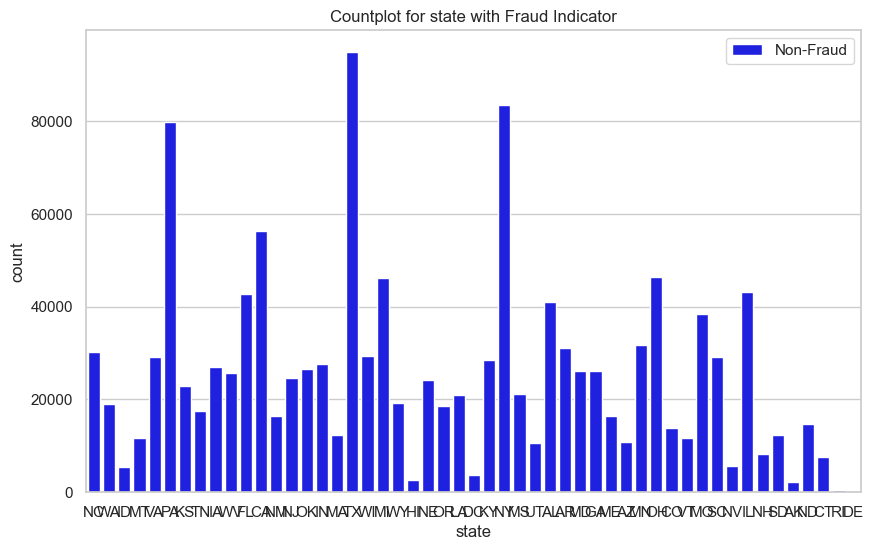

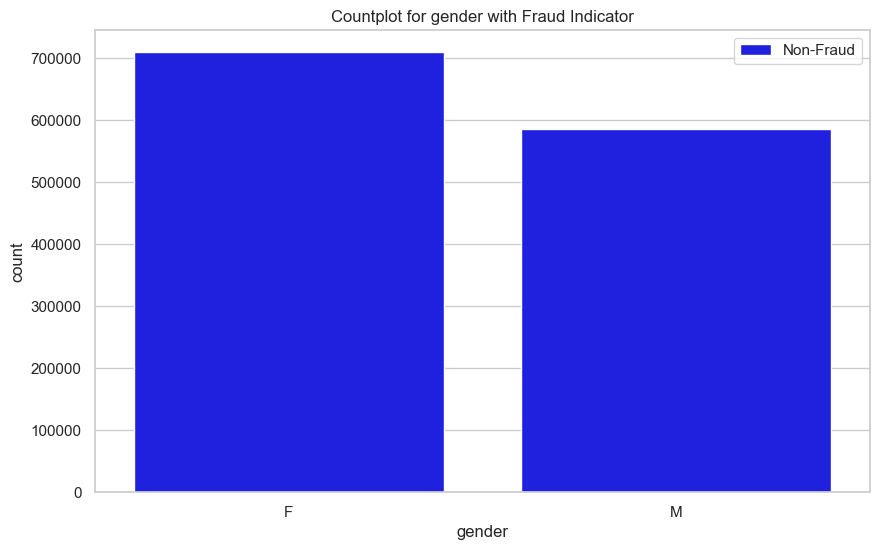

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

for column in ['category', 'state', 'gender']:
    if column != 'trans_date_trans_time':
        plt.figure(figsize=(10, 6))

        # Categorical columns
        if fraud_df_v2[column].dtype == 'object':
            # Create countplot for all instances
            sns.countplot(x=column, data=fraud_df_v2, label='Non-Fraud', color='blue')

            plt.title(f'Countplot for {column} with Fraud Indicator')
            plt.legend()

        plt.show()

C:\Users\Atif\AppData\Local\Temp\ipykernel_19452\3099518658.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=70)


<Figure size 2000x1200 with 0 Axes>

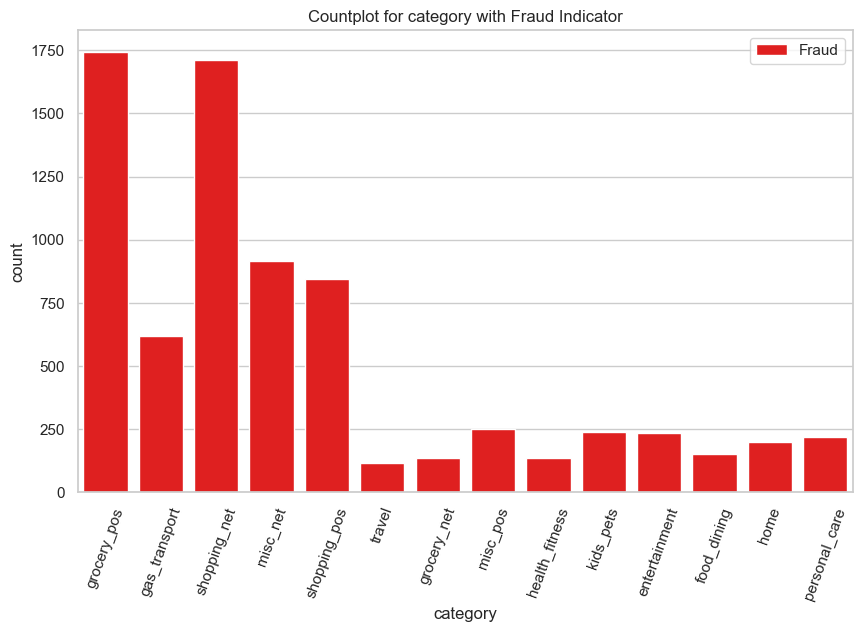

C:\Users\Atif\AppData\Local\Temp\ipykernel_19452\3099518658.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=70)


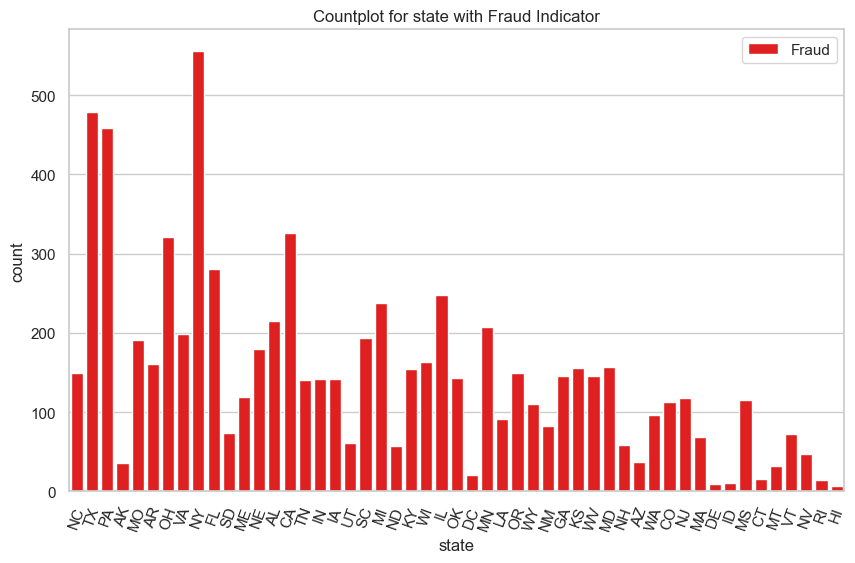

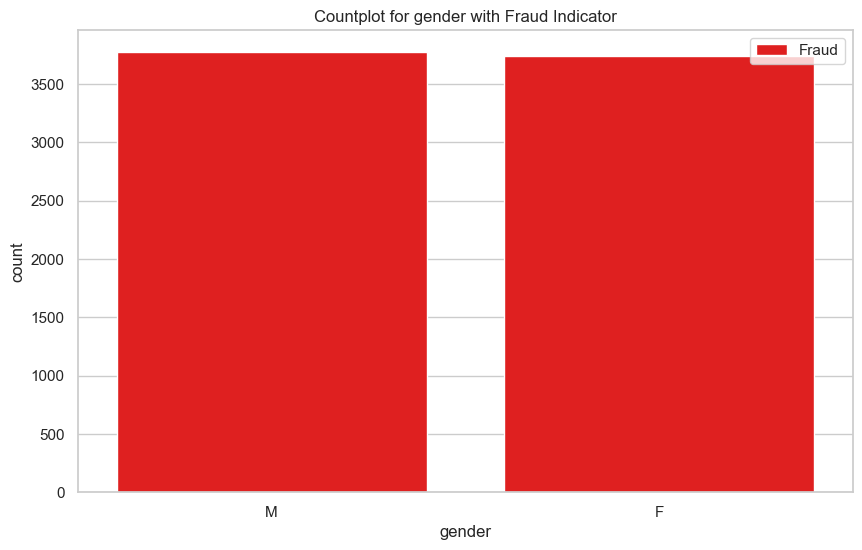

In [46]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

for column in ['category', 'state', 'gender']:
    if column != 'trans_date_trans_time':
        plt.figure(figsize=(10, 6))

        # Categorical columns
        if fraud_df_v2[column].dtype == 'object':

            # Create countplot for fraud instances
            ax = sns.countplot(x=column, data=fraud_df_v2[fraud_df_v2['is_fraud'] == 1], label='Fraud', color='red')

            # Rotate x-axis labels for the 'state' column
            if column == 'state' or column == 'category':
                ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

            plt.title(f'Countplot for {column} with Fraud Indicator')
            plt.legend()

        plt.show()



<Figure size 2000x1200 with 0 Axes>

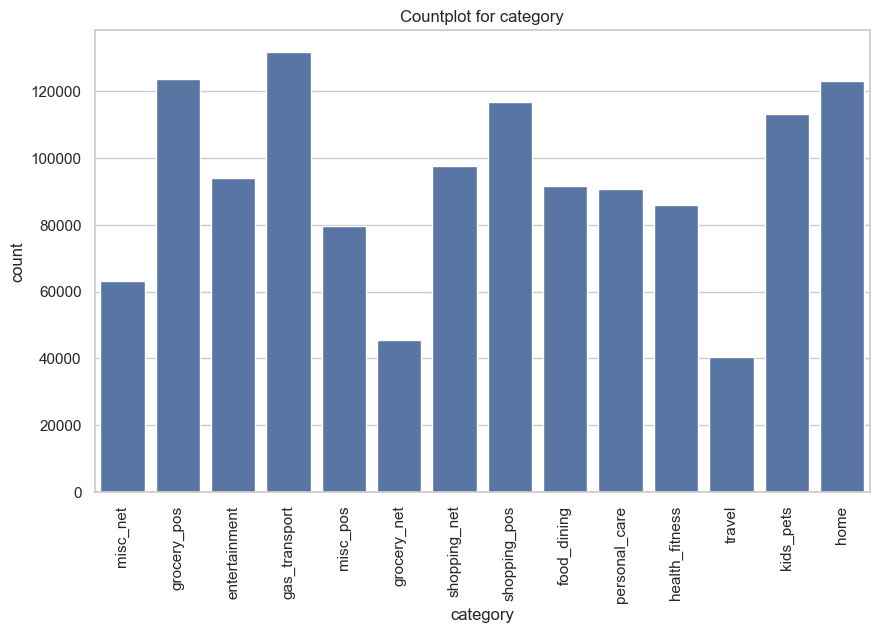

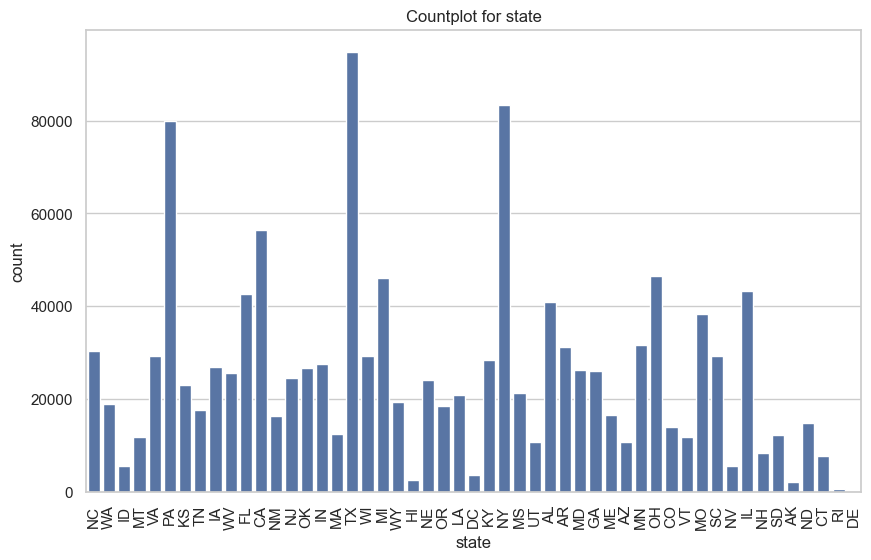

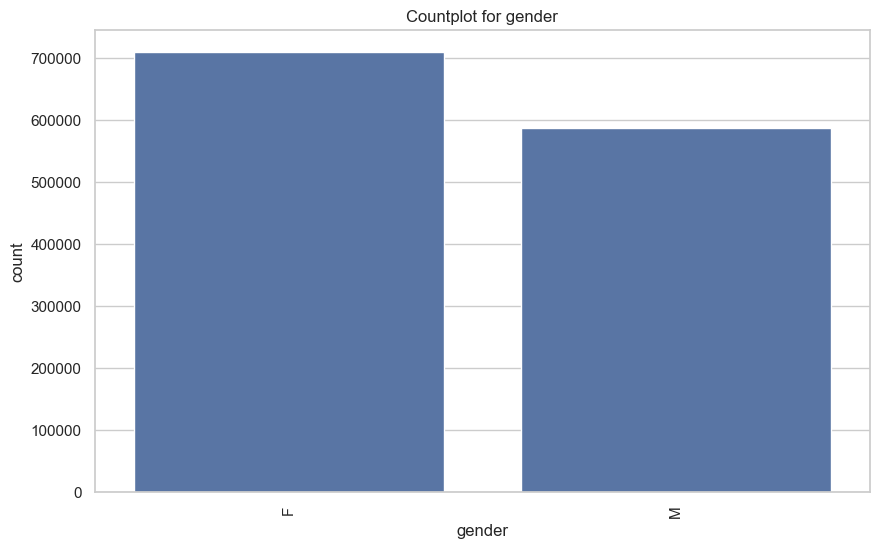

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

for column in ['category', 'state', 'gender']:
    plt.figure(figsize=(10, 6))

    # Categorical columns
    sns.countplot(x=column, data=fraud_df_v2)
    plt.title(f'Countplot for {column}')
        
    # Rotate x-axis labels for all categorical columns
    plt.xticks(rotation=90)

    plt.show()


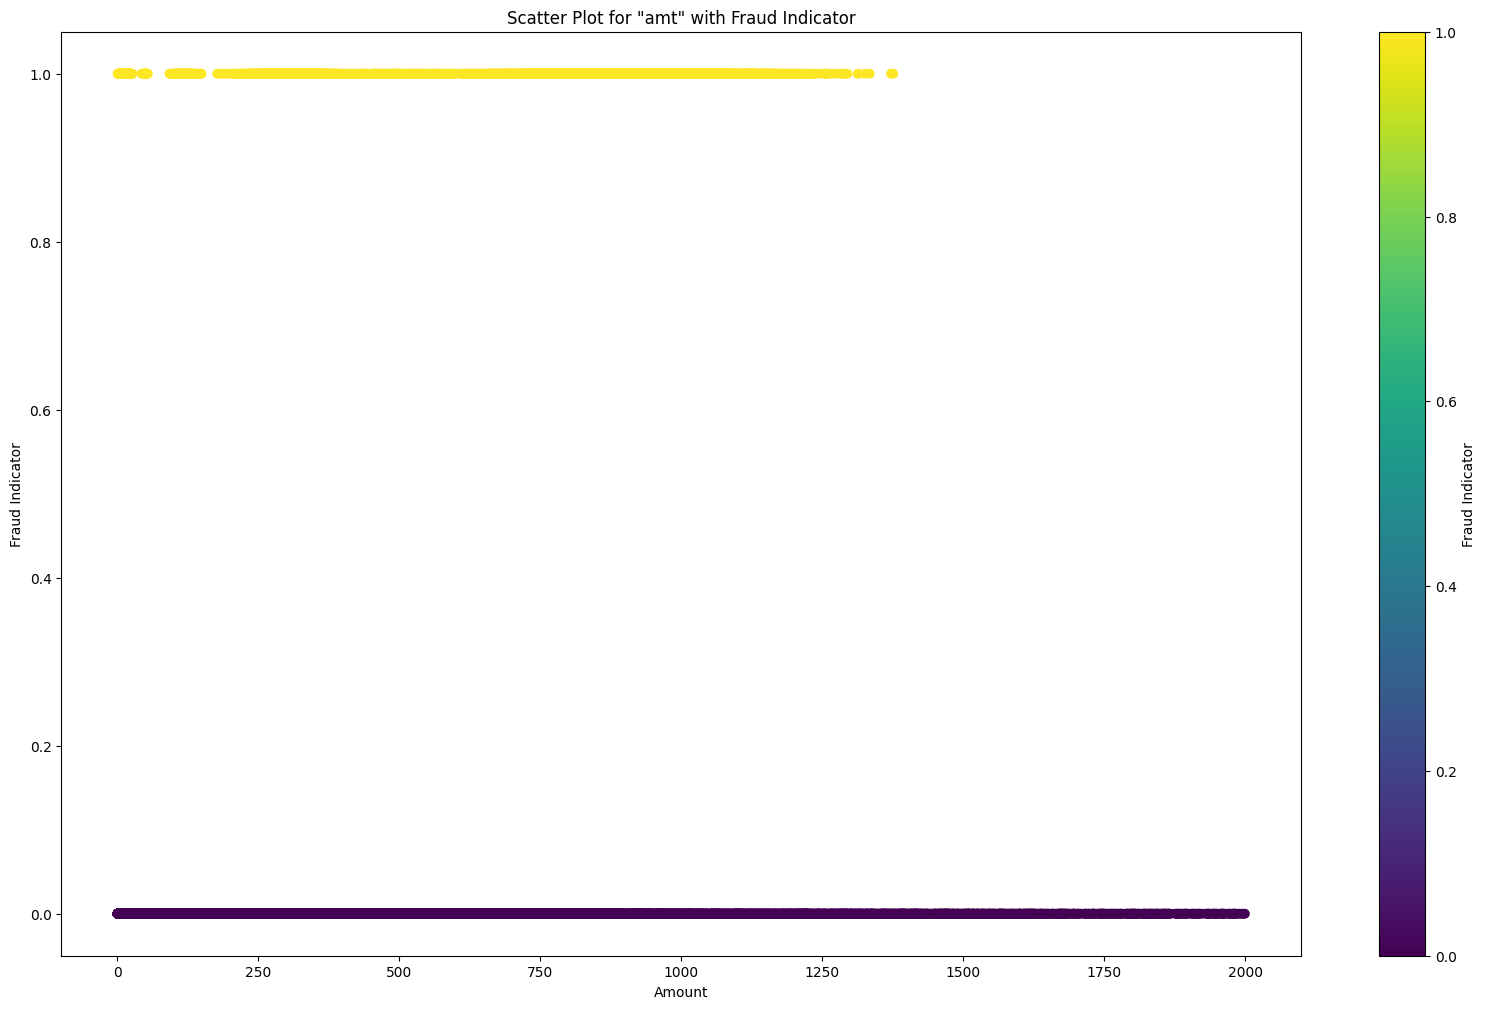

In [33]:
#amt
plt.figure(figsize=(20, 12))

plt.scatter(x=fraud_df_v3['amt'], y=fraud_df_v3['is_fraud'], c=fraud_df_v3['is_fraud'], cmap='viridis', marker='o')

plt.title(f'Scatter Plot for "amt" with Fraud Indicator')
plt.xlabel('Amount')
plt.ylabel('Fraud Indicator')
plt.colorbar(label='Fraud Indicator')
plt.show()

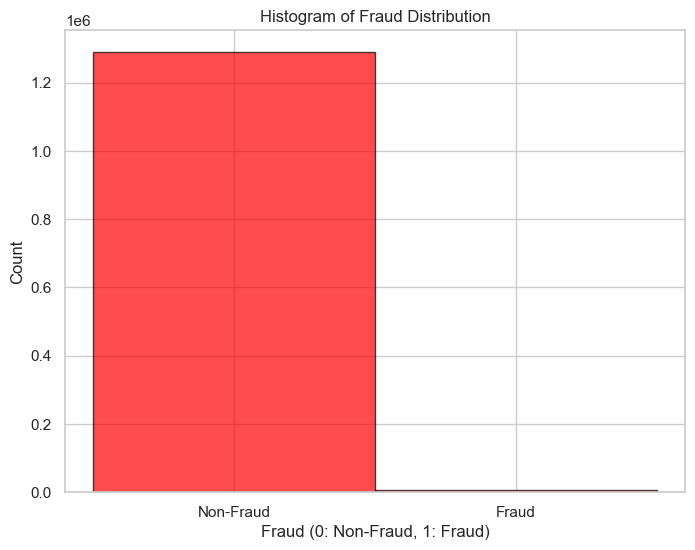

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(fraud_df_v2['is_fraud'], bins=[-0.5, 0.5, 1.5], edgecolor='black', color=[ 'red'], alpha=0.7)
plt.title('Histogram of Fraud Distribution')
plt.xlabel('Fraud (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()



# Feature Engineering

''cc_num'' frequency encoding

''category'' one hot encoding because of 14 categories
''gender'' one hot encoding of 2
''state'' one hot encoding of 

''city'' label Ordinal encoding
''job'' label Ordinal encoding
''merchant'' Ordinal encoding
''city_pop'' label encoding
''street'' label encoding

In [54]:
fraud_df_v2['trans_date_trans_time'] = pd.to_datetime(fraud_df_v2['trans_date_trans_time'])
fraud_df_v2['trans_time'] = fraud_df_v2['trans_date_trans_time'].dt.time
fraud_df_v2['trans_date'] = fraud_df_v2['trans_date_trans_time'].dt.date
fraud_df_v2['trans_month'] = fraud_df_v2['trans_date_trans_time'].dt.month

fraud_df_v2['dob'] = pd.to_datetime(fraud_df_v2['dob'])
fraud_df_v2['trans_date'] = pd.to_datetime(fraud_df_v2['trans_date'])

In [55]:
fraud_df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   street                 1296675 non-null  object        
 7   city                   1296675 non-null  object        
 8   state                  1296675 non-null  object        
 9   city_pop               1296675 non-null  int64         
 10  job                    1296675 non-null  object        
 11  dob                    1296675 non-null  datetime64[ns]
 12  is_fraud               12966

In [ ]:
fraud_df_v2['age'] = (np.floor_divide((fraud_df_v2['trans_date'] - fraud_df_v2['dob']).dt.days, 365.25)).astype(int)

In [57]:
fraud_df_v2

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,city_pop,job,dob,is_fraud,trans_time,trans_date,trans_month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,3495,"Psychologist, counselling",1988-03-09,0,00:00:18,2019-01-01,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,149,Special educational needs teacher,1978-06-21,0,00:00:44,2019-01-01,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,4154,Nature conservation officer,1962-01-19,0,00:00:51,2019-01-01,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,1939,Patent attorney,1967-01-12,0,00:01:16,2019-01-01,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,99,Dance movement psychotherapist,1986-03-28,0,00:03:06,2019-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,162 Jessica Row Apt. 072,Hatch,UT,258,Geoscientist,1961-11-24,0,12:12:08,2020-06-21,6
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,100,"Production assistant, television",1979-12-11,0,12:12:19,2020-06-21,6
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,899,Naval architect,1967-08-30,0,12:12:32,2020-06-21,6
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,42933 Ryan Underpass,Manderson,SD,1126,Volunteer coordinator,1980-08-18,0,12:13:36,2020-06-21,6


In [58]:
fraud_df_v3=fraud_df_v2.loc[fraud_df_v2['amt']<2000]

In [59]:
fraud_df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1295944 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1295944 non-null  datetime64[ns]
 1   cc_num                 1295944 non-null  int64         
 2   merchant               1295944 non-null  object        
 3   category               1295944 non-null  object        
 4   amt                    1295944 non-null  float64       
 5   gender                 1295944 non-null  object        
 6   street                 1295944 non-null  object        
 7   city                   1295944 non-null  object        
 8   state                  1295944 non-null  object        
 9   city_pop               1295944 non-null  int64         
 10  job                    1295944 non-null  object        
 11  dob                    1295944 non-null  datetime64[ns]
 12  is_fraud               1295944 no

In [61]:
fraud_df_v3['day']=False


C:\Users\Atif\AppData\Local\Temp\ipykernel_19452\2344006120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df_v3['day']=False


In [85]:
# Create 'day' and 'night' columns
day_condition = (fraud_df_v3['trans_date_trans_time'].dt.hour >= 0) & (fraud_df_v3['trans_date_trans_time'].dt.hour < 12)
night_condition = (fraud_df_v3['trans_date_trans_time'].dt.hour >= 12) & (fraud_df_v3['trans_date_trans_time'].dt.hour < 24)

fraud_df_v3['day'] = day_condition.astype(int)
fraud_df_v3['night'] = night_condition.astype(int)


C:\Users\Atif\AppData\Local\Temp\ipykernel_19452\1360590108.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df_v3['day'] = day_condition.astype(int)
C:\Users\Atif\AppData\Local\Temp\ipykernel_19452\1360590108.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df_v3['night'] = night_condition.astype(int)


In [87]:
fraud_df_v3['weekday'] = (fraud_df_v3['trans_date_trans_time'].dt.dayofweek < 5).astype(int)
fraud_df_v3

C:\Users\Atif\AppData\Local\Temp\ipykernel_19452\3142809014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df_v3['weekday'] = (fraud_df_v3['trans_date_trans_time'].dt.dayofweek < 5).astype(int)


,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,city_pop,job,dob,is_fraud,trans_time,trans_date,trans_month,day,night,weekday
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,3495,"Psychologist, counselling",1988-03-09,0,2019-01-01 00:00:18,2019-01-01,1,1,0,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,149,Special educational needs teacher,1978-06-21,0,2019-01-01 00:00:44,2019-01-01,1,1,0,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,4154,Nature conservation officer,1962-01-19,0,2019-01-01 00:00:51,2019-01-01,1,1,0,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,1939,Patent attorney,1967-01-12,0,2019-01-01 00:01:16,2019-01-01,1,1,0,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,99,Dance movement psychotherapist,1986-03-28,0,2019-01-01 00:03:06,2019-01-01,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,162 Jessica Row Apt. 072,Hatch,UT,258,Geoscientist,1961-11-24,0,2020-06-21 12:12:08,2020-06-21,6,0,1,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,100,"Production assistant, television",1979-12-11,0,2020-06-21 12:12:19,2020-06-21,6,0,1,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,899,Naval architect,1967-08-30,0,2020-06-21 12:12:32,2020-06-21,6,0,1,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,42933 Ryan Underpass,Manderson,SD,1126,Volunteer coordinator,1980-08-18,0,2020-06-21 12:13:36,2020-06-21,6,0,1,0


In [91]:
fraud_df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1295944 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1295944 non-null  datetime64[ns]
 1   cc_num                 1295944 non-null  int64         
 2   merchant               1295944 non-null  object        
 3   category               1295944 non-null  object        
 4   amt                    1295944 non-null  float64       
 5   gender                 1295944 non-null  object        
 6   street                 1295944 non-null  object        
 7   city                   1295944 non-null  object        
 8   state                  1295944 non-null  object        
 9   city_pop               1295944 non-null  int64         
 10  job                    1295944 non-null  object        
 11  dob                    1295944 non-null  datetime64[ns]
 12  is_fraud               1295944 no

In [105]:
fraud_df_v3.loc[fraud_df_v3['weekday'] == 0]

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,city_pop,job,dob,is_fraud,trans_time,trans_date,trans_month,day,night,weekday
6242,2019-01-05 00:00:56,4451438912406400,fraud_Prohaska-Murray,gas_transport,47.93,F,7535 Amanda Manors Suite 293,Norman,AR,1383,Manufacturing engineer,1999-09-11,0,2019-01-05 00:00:56,2019-01-05,1,1,0,0
6243,2019-01-05 00:02:15,3559679414981506,fraud_Erdman-Kertzmann,gas_transport,92.65,F,292 Cassidy Oval,Lowville,NY,8830,Theme park manager,1991-03-29,0,2019-01-05 00:02:15,2019-01-05,1,1,0,0
6244,2019-01-05 00:02:29,3592325941359225,fraud_Flatley-Durgan,misc_net,7.48,F,1007 Colton Forks,Hopewell,VA,31970,Purchasing manager,1935-08-15,0,2019-01-05 00:02:29,2019-01-05,1,1,0,0
6245,2019-01-05 00:02:30,3553629419254918,fraud_Schamberger-O'Keefe,grocery_pos,77.49,F,7202 Jeffrey Mills,Conway,WA,85,"Research officer, political party",1984-09-01,0,2019-01-05 00:02:30,2019-01-05,1,1,0,0
6246,2019-01-05 00:03:02,371284424780634,fraud_Runte-Mohr,food_dining,38.29,M,574 Patricia Extensions,Lubbock,TX,254282,"Doctor, general practice",1952-01-29,0,2019-01-05 00:03:02,2019-01-05,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,162 Jessica Row Apt. 072,Hatch,UT,258,Geoscientist,1961-11-24,0,2020-06-21 12:12:08,2020-06-21,6,0,1,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,100,"Production assistant, television",1979-12-11,0,2020-06-21 12:12:19,2020-06-21,6,0,1,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,899,Naval architect,1967-08-30,0,2020-06-21 12:12:32,2020-06-21,6,0,1,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,42933 Ryan Underpass,Manderson,SD,1126,Volunteer coordinator,1980-08-18,0,2020-06-21 12:13:36,2020-06-21,6,0,1,0


In [107]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Filter DataFrame for true frauds
true_frauds = fraud_df_v3[fraud_df_v3['is_fraud'] == 1]

# Group by 'day' column and count the number of true frauds
fraud_counts = true_frauds.groupby(['day']).size().reset_index(name='count')

# Plot the bar plot
sns.barplot(x='day', y='count', data=fraud_counts, palette='viridis')

plt.title('Number of True Frauds during the Day')
plt.xlabel('Day')
plt.ylabel('Number of True Frauds')
plt.show()



TypeError: Data source must be a DataFrame or Mapping, not <class 'int'>.

<Figure size 1000x600 with 0 Axes>

C:\Users\Atif\AppData\Local\Temp\ipykernel_19452\463882005.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='count', data=fraud_counts, palette='viridis')


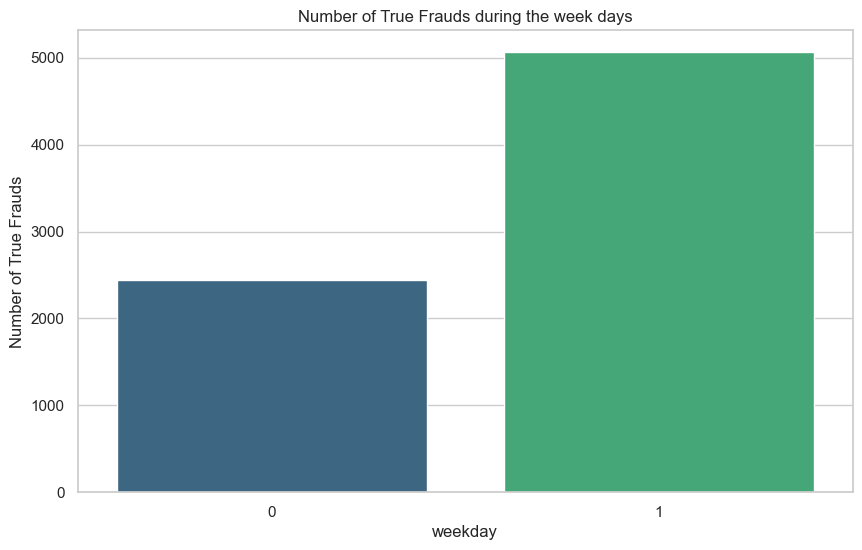

In [90]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

true_frauds = fraud_df_v3[fraud_df_v3['is_fraud'] == 1]

fraud_counts = true_frauds.groupby(['weekday']).size().reset_index(name='count')

sns.barplot(x='weekday', y='count', data=fraud_counts, palette='viridis')

plt.title('Number of True Frauds during the week days')
plt.xlabel('weekday')
plt.ylabel('Number of True Frauds')
plt.show()